In [540]:
import os #change directory
import pandas as pd #work on dataframe
import matplotlib.pyplot as plt  #plot charts
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler    #Rescaling
from sklearn.model_selection import train_test_split  #Train-test split
import statsmodels.api as sm  #Model building
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor  #Calculating VIF
from sklearn import metrics  # Model evaluation
from sklearn.metrics import r2_score, mean_squared_error #r2 score
from sklearn.linear_model import LinearRegression, Ridge, Lasso # Regularization
from sklearn.model_selection import GridSearchCV   #Hyperparameter tuning

In [541]:
os.chdir('C:\\Users\\jaxer\\Downloads')  #Change directory
pd.set_option('display.max_rows', 90)
pd.set_option('display.max_columns', None) #show all columns

In [542]:
df= pd.read_csv('train.csv') #import the dataset

# Data Inspection

In [543]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [545]:
# Find out the percentage of missing values in each column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing')

,column_name,percent_missing
Id,Id,0.000000
TotalBsmtSF,TotalBsmtSF,0.000000
Heating,Heating,0.000000
SaleCondition,SaleCondition,0.000000
CentralAir,CentralAir,0.000000
1stFlrSF,1stFlrSF,0.000000
2ndFlrSF,2ndFlrSF,0.000000
LowQualFinSF,LowQualFinSF,0.000000
GrLivArea,GrLivArea,0.000000
BsmtFullBath,BsmtFullBath,0.000000


1. Treating missing value: Delete variables containing more than 80% of missing value. For varaibles containing less than 40% of missing value, delete the empty entry. Conduct imputation for the variable 'FireplaceQu' which contains 47% of missing value. Since it is a categorical variable, we choose to impute by mode.

In [546]:
#Delete high percentage missing value variables. 
a=['PoolQC','MiscFeature','Alley','Fence']
df2=df.drop(a,axis=1)
#Impute 'FireplaceQu'
df2['FireplaceQu'] = df2['FireplaceQu'].fillna(df2['FireplaceQu'].mode()[0])
#Finally delete rows with missing value
df2.dropna(inplace=True)


In [547]:
df2.drop_duplicates(inplace=True) # No duplicate rows

In [548]:
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Gd,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


   2. Treating redundant variables: The varialbe 'OverallQual' reflects the overall material and finish of the house. Variables such as 'Garagefinish', 'kitchenQual' also reflects the same info. We choose to keep 'OverallQual' because a house with good kitchen rarely has unbearable bathroom. Besides, customers rarely shows strong preference toward kitchen/ bathroom while totally ignore other parts.  

In [549]:
b=['Id','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','HeatingQC','FireplaceQu','GarageFinish','GarageQual','GarageCond','KitchenQual']
df3=df2.drop(b,axis=1)

In [550]:
#Label encoding
c=df3.select_dtypes(include=['object']).columns.to_list() #select categorical columns
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
#Encoding labels
for i in c:
    df3[i]= label_encoder.fit_transform(df3[i])


# EDA

1. Checking correlation

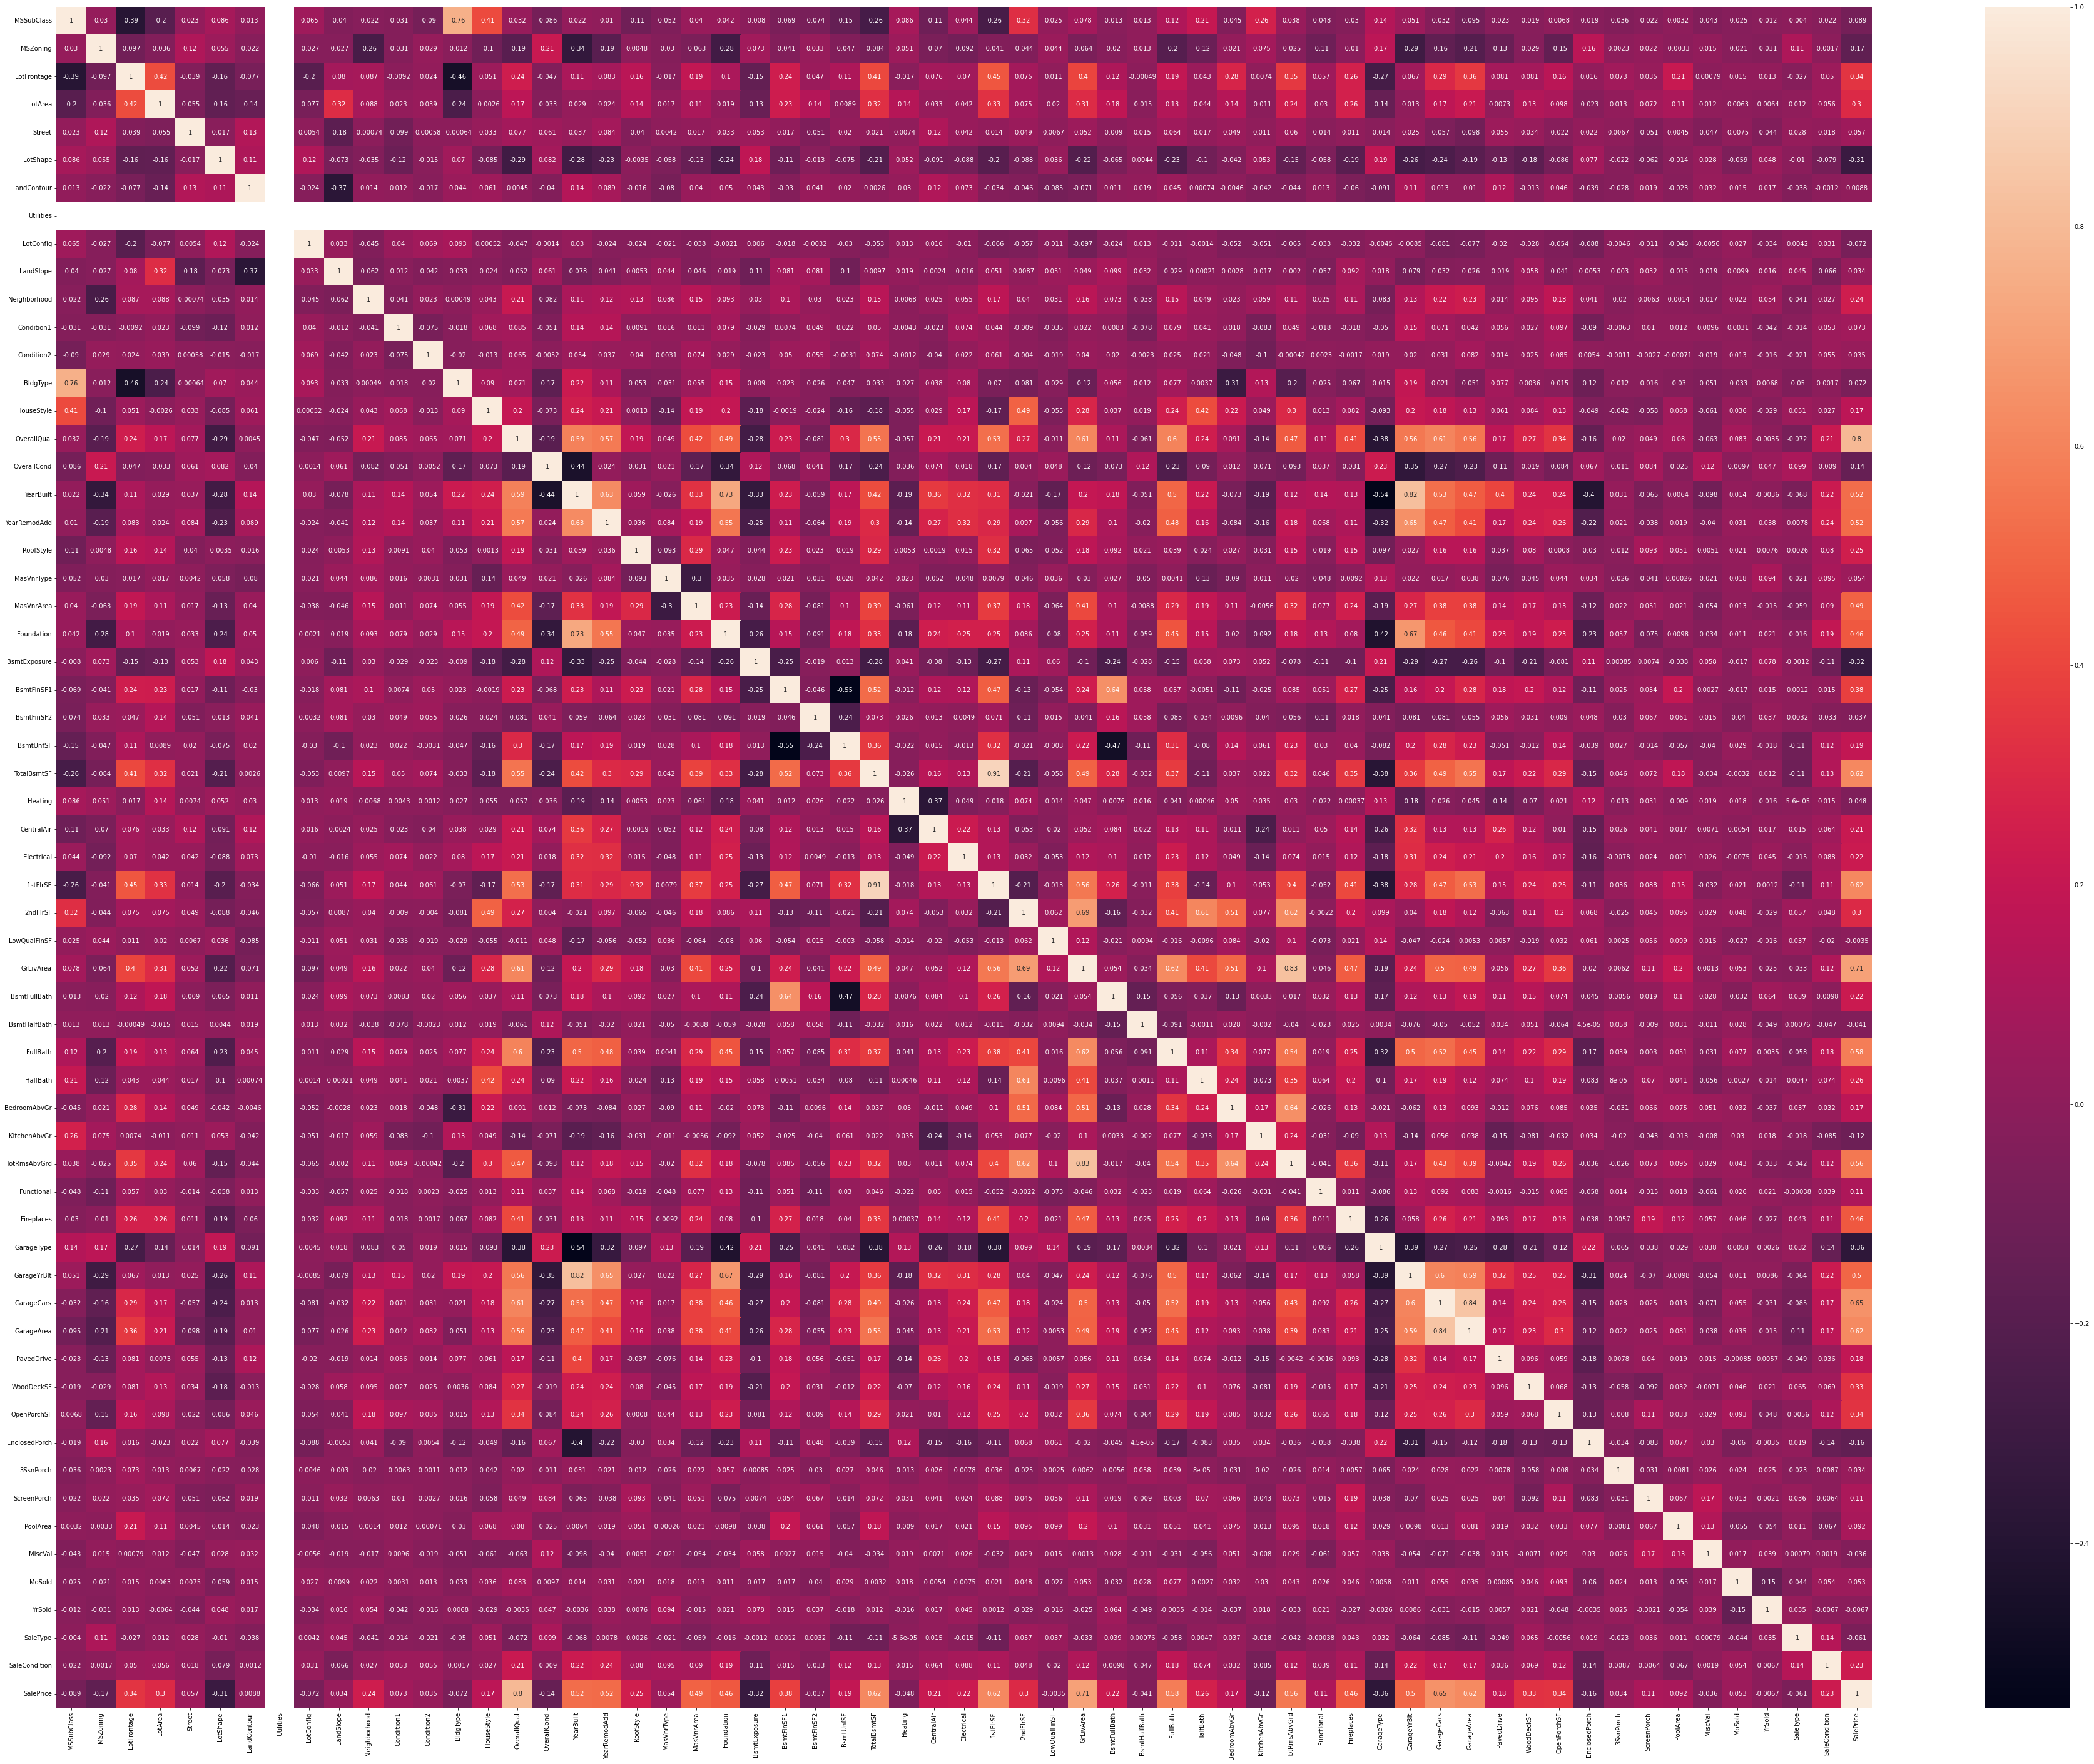

In [551]:
#Heatmap
plt.figure(figsize = (65, 50))
sns.heatmap(df3.corr(), annot=True)
plt.show()


According to the heatmap, the variable 'GarageType' correlates with many other variables. Thus we choose to drop it.

In [552]:
df3.drop('GarageType', axis=1, inplace= True)

# Univariate analysis

Text(0.5, 0, 'SalePrice')

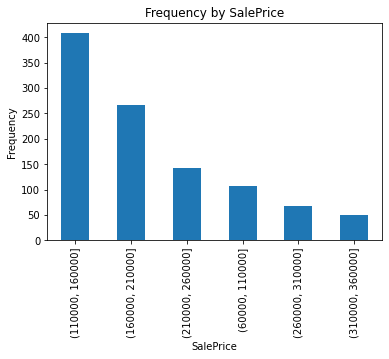

In [553]:
#Plot histogram for SalePrice
bins1 = pd.cut(df3['SalePrice'], [60000,110000,160000,210000,260000,310000,360000])   # Binning 
temp1=bins1.value_counts()
ax1=temp1.plot.bar()                          #BarPlot
ax1.set_title('Frequency by SalePrice')           #set title
ax1.set_ylabel("Frequency")                  #set label
ax1.set_xlabel("SalePrice") 

Insight: The majority houses sales for 110000-210000 

[Text(0.5, 0, 'SalePrice')]

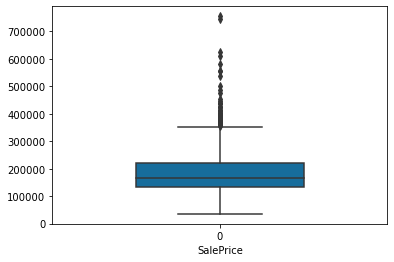

In [554]:
#plot boxplot for SalePrice
sns.boxplot(data=df3.SalePrice, width=0.5,palette="colorblind").set(xlabel='SalePrice')

No outlier detected

Text(0.5, 0, 'overallquality')

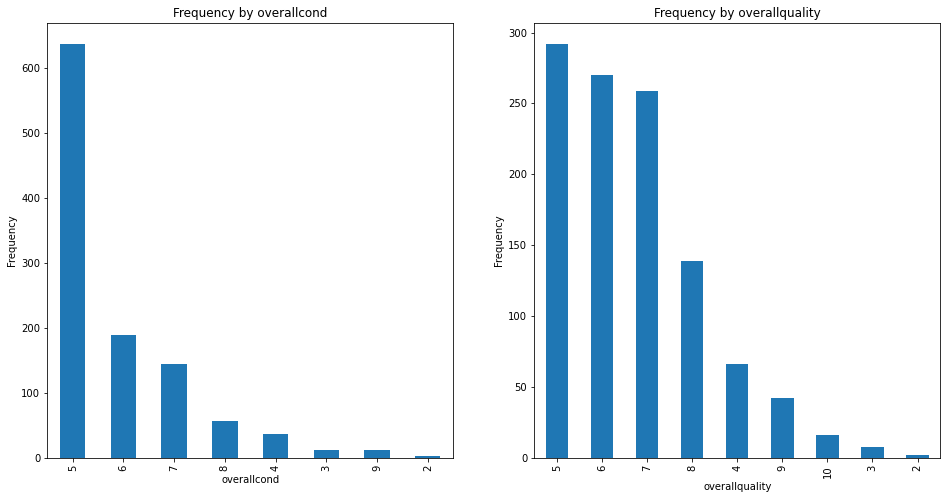

In [555]:
#Plot histogram for categorical variables
fig, axes = plt.subplots(1, 2, figsize=(16,8))  #Create subplots
plt.subplot(1, 2, 1)
temp11= df2.OverallCond.value_counts()
ax1=temp11.plot.bar()                          #BarPlot
ax1.set_title('Frequency by overallcond')           #set title
ax1.set_ylabel("Frequency")                  #set label
ax1.set_xlabel("overallcond") 
plt.subplot(1, 2, 2)
temp2= df2.OverallQual.value_counts()
ax2=temp2.plot.bar()                          #BarPlot
ax2.set_title('Frequency by overallquality')           #set title
ax2.set_ylabel("Frequency")                  #set label
ax2.set_xlabel("overallquality") 


Insight: The majority houses sold have overallcondition and overallquality both on 5 which is medium in the scale. 

# Bivariate Analysis

[Text(0.5, 1.0, 'SalePrice for TotalBsmtSF')]

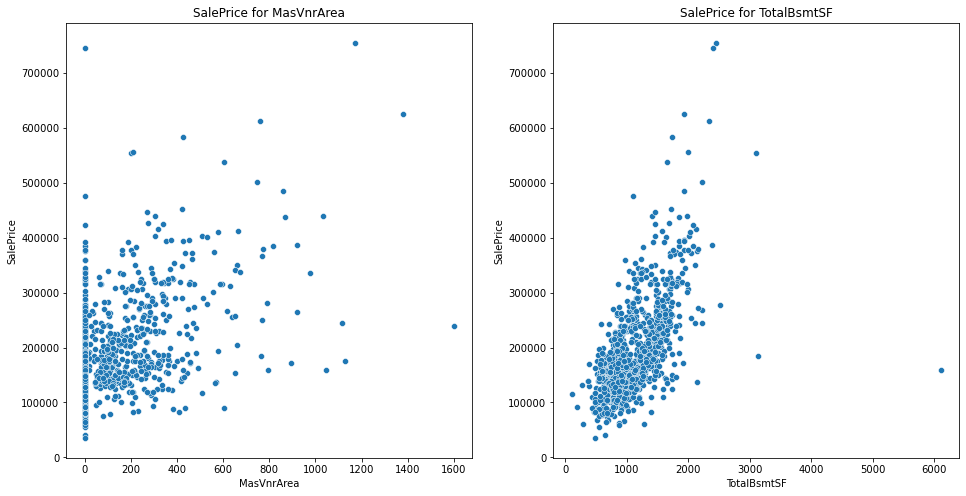

In [556]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))  #Create subplots
#For the variable 'atemp'
plt.subplot(1, 2, 1)
sns.scatterplot(data = df3, x = "MasVnrArea", y = 'SalePrice').set(title='SalePrice for MasVnrArea')
#For the variable 'atemp'
plt.subplot(1, 2, 2)
sns.scatterplot(data = df3, x = "TotalBsmtSF", y = 'SalePrice').set(title='SalePrice for TotalBsmtSF')


Insights: The salePrice and MasNvrArea shows no pattern whereas it shows linear relationship with TotalBsmtSF

# Model Building

Train-test split

In [557]:
np.random.seed(0) # We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df3, train_size = 0.8, test_size = 0.2, random_state = 100)

Rescaling

In [558]:
scaler = StandardScaler()
d=df3.columns.to_list()
for i in d:
    df_train[i] = scaler.fit_transform(df_train[[i]])

<ipython-input-558-82fc2ff3d310>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[i] = scaler.fit_transform(df_train[[i]])
<ipython-input-558-82fc2ff3d310>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[i] = scaler.fit_transform(df_train[[i]])
<ipython-input-558-82fc2ff3d310>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [559]:
df3

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrType,MasVnrArea,Foundation,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,196.0,2,3,706,0,150,856,0,1,4,856,854,0,1710,1,0,2,1,3,1,8,5,0,2003.0,2,548,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,2,0.0,1,1,978,0,284,1262,0,1,4,1262,0,0,1262,0,1,2,0,3,1,6,5,1,1976.0,2,460,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,162.0,2,2,486,0,434,920,0,1,4,920,866,0,1786,1,0,2,1,3,1,6,5,1,2001.0,2,608,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,2,0.0,0,3,216,0,540,756,0,1,4,961,756,0,1717,1,0,1,0,3,1,7,5,1,1998.0,3,642,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,350.0,2,0,655,0,490,1145,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,9,5,1,2000.0,3,836,2,192,84,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,3,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,2,0.0,2,3,0,0,953,953,0,1,4,953,694,0,1647,0,0,2,1,3,1,7,5,1,1999.0,2,460,2,0,40,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,3,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,3,119.0,1,3,790,163,589,1542,0,1,4,2073,0,0,2073,1,0,2,0,3,1,7,2,2,1978.0,2,500,2,349,0,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,2,0.0,3,3,275,0,877,1152,0,1,4,1188,1152,0,2340,0,0,2,0,4,1,9,5,2,1941.0,1,252,2,0,60,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,3,3,0,4,0,12,2,2,0,2,5,6,1950,1996,3,2,0.0,1,2,49,1029,0,1078,0,1,0,1078,0,0,1078,1,0,1,0,2,1,5,5,0,1950.0,1,240,2,366,0,112,0,0,0,0,4,2010,8,4,142125


Dividing into X and Y

In [560]:
y_train = df_train.pop('SalePrice')
X_train = df_train

First we build a full model

In [561]:
# Building the regression model
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [562]:
# Predictions on the basis of the model
y_pred = reg.predict(X_train)
# y_pred
# Find the value of r squared
r2_score(y_train , y_pred) # The three predictors considered explain about 90.25% of the variation in the data
Adj_r2 = 1 - (1-r2_score(y_train, y_pred)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Adj_r2

0.8135293919925457

Second, we build a model using RFE

In [563]:
# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

C:\Python\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=30 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [564]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('MSZoning', False, 11),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('Street', False, 3),
 ('LotShape', True, 1),
 ('LandContour', False, 10),
 ('Utilities', True, 1),
 ('LotConfig', False, 29),
 ('LandSlope', False, 13),
 ('Neighborhood', True, 1),
 ('Condition1', False, 20),
 ('Condition2', False, 28),
 ('BldgType', False, 2),
 ('HouseStyle', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 12),
 ('RoofStyle', True, 1),
 ('MasVnrType', True, 1),
 ('MasVnrArea', True, 1),
 ('Foundation', False, 5),
 ('BsmtExposure', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('Heating', False, 19),
 ('CentralAir', False, 27),
 ('Electrical', False, 26),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 18),
 ('FullBath', True, 1),

In [565]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['MSZoning', 'Street', 'LandContour', 'LotConfig', 'LandSlope',
       'Condition1', 'Condition2', 'BldgType', 'YearRemodAdd', 'Foundation',
       'Heating', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'HalfBath',
       'Fireplaces', 'GarageYrBlt', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

Building model using statsmodel, for the detailed statistics

In [566]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     144.0
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          1.29e-294
Time:                        13:59:13   Log-Likelihood:                -488.69
No. Observations:                 875   AIC:                             1033.
Df Residuals:                     847   BIC:                             1167.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.901e-16      0.015  -6.12e-14   

C:\Python\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Compared with the full model, the adjusted r-squared has improved.  

RFE with 20 features

In [567]:
# Running RFE with the output number of the variable equal to 30
lm1 = LinearRegression()
lm1.fit(X_train, y_train)

rfe1 = RFE(lm1, 20)             # running RFE
rfe1 = rfe1.fit(X_train, y_train)

C:\Python\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [568]:
list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))

[('MSSubClass', True, 1),
 ('MSZoning', False, 21),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('Street', False, 13),
 ('LotShape', False, 9),
 ('LandContour', False, 20),
 ('Utilities', False, 8),
 ('LotConfig', False, 39),
 ('LandSlope', False, 23),
 ('Neighborhood', False, 2),
 ('Condition1', False, 30),
 ('Condition2', False, 38),
 ('BldgType', False, 12),
 ('HouseStyle', False, 11),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 22),
 ('RoofStyle', False, 10),
 ('MasVnrType', True, 1),
 ('MasVnrArea', True, 1),
 ('Foundation', False, 15),
 ('BsmtExposure', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 7),
 ('BsmtUnfSF', False, 4),
 ('TotalBsmtSF', False, 5),
 ('Heating', False, 29),
 ('CentralAir', False, 37),
 ('Electrical', False, 36),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 6),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 28),
 ('FullBa

In [569]:
col = X_train.columns[rfe1.support_]
X_train.columns[~rfe1.support_]

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'YearRemodAdd', 'RoofStyle', 'Foundation',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'CentralAir',
       'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'HalfBath', 'Fireplaces',
       'GarageYrBlt', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [570]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe1 = X_train[col]
# Adding a constant variable 
X_train_rfe1 = sm.add_constant(X_train_rfe1)
lm = sm.OLS(y_train,X_train_rfe1).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     189.1
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          4.25e-297
Time:                        13:59:13   Log-Likelihood:                -501.40
No. Observations:                 875   AIC:                             1045.
Df Residuals:                     854   BIC:                             1145.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.935e-17      0.015     -2e-15   

C:\Python\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Adjusted-r2 has decreased, we start analyzing RFE with 30 features model

'BsmtFinSF2' is insignificant in presence of other variables; can be dropped

In [571]:
X_train_new = X_train_rfe.drop(["BsmtFinSF2"], axis = 1)

Rebuild model

In [572]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     144.0
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          1.29e-294
Time:                        13:59:13   Log-Likelihood:                -488.69
No. Observations:                 875   AIC:                             1033.
Df Residuals:                     847   BIC:                             1167.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.588e-16      0.015  -5.91e-14   

Follow the same logic for variables with p-value above 0.05

In [573]:
X_train_new1 = X_train_new.drop(["TotalBsmtSF"], axis = 1)
X_train_lm = sm.add_constant(X_train_new1)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          1.05e-295
Time:                        13:59:13   Log-Likelihood:                -488.69
No. Observations:                 875   AIC:                             1031.
Df Residuals:                     848   BIC:                             1160.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -7.86e-16      0.015  -5.41e-14   

In [574]:
X_train_new2 = X_train_new1.drop(["LowQualFinSF"], axis = 1)
X_train_lm = sm.add_constant(X_train_new2)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          1.05e-295
Time:                        13:59:14   Log-Likelihood:                -488.69
No. Observations:                 875   AIC:                             1031.
Df Residuals:                     848   BIC:                             1160.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.444e-16      0.015  -5.13e-14   

In [575]:
X_train_new3 = X_train_new2.drop(["Utilities"], axis = 1)
X_train_lm = sm.add_constant(X_train_new3)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          1.05e-295
Time:                        13:59:14   Log-Likelihood:                -488.69
No. Observations:                 875   AIC:                             1031.
Df Residuals:                     848   BIC:                             1160.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.513e-16      0.015  -5.17e-14   

In [576]:
X_train_new4 = X_train_new3.drop(["2ndFlrSF"], axis = 1)
X_train_lm = sm.add_constant(X_train_new4)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     155.8
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          9.89e-297
Time:                        13:59:14   Log-Likelihood:                -488.87
No. Observations:                 875   AIC:                             1030.
Df Residuals:                     849   BIC:                             1154.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.066e-16      0.015  -5.56e-14   

In [577]:
X_train_new5 = X_train_new4.drop(["1stFlrSF"], axis = 1)
X_train_lm = sm.add_constant(X_train_new5)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     162.3
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          1.07e-297
Time:                        13:59:14   Log-Likelihood:                -489.21
No. Observations:                 875   AIC:                             1028.
Df Residuals:                     850   BIC:                             1148.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.935e-17      0.015  -2.02e-15   

In [578]:
X_train_new6 = X_train_new5.drop(["BsmtUnfSF"], axis = 1)
X_train_lm = sm.add_constant(X_train_new6)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     169.5
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          9.25e-299
Time:                        13:59:14   Log-Likelihood:                -489.35
No. Observations:                 875   AIC:                             1027.
Df Residuals:                     851   BIC:                             1141.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.935e-17      0.015  -2.02e-15   

In [579]:
X_train_new7 = X_train_new6.drop(["RoofStyle"], axis = 1)
X_train_lm = sm.add_constant(X_train_new7)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     176.5
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          4.00e-299
Time:                        13:59:14   Log-Likelihood:                -491.17
No. Observations:                 875   AIC:                             1028.
Df Residuals:                     852   BIC:                             1138.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.935e-17      0.015  -2.02e-15   

In [580]:
X_train_new8 = X_train_new7.drop(["HouseStyle"], axis = 1)
X_train_lm = sm.add_constant(X_train_new8)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          7.52e-300
Time:                        13:59:14   Log-Likelihood:                -492.15
No. Observations:                 875   AIC:                             1028.
Df Residuals:                     853   BIC:                             1133.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.935e-17      0.015  -2.02e-15   

In [581]:
X_train_new9 = X_train_new8.drop(["LotShape"], axis = 1)
X_train_lm = sm.add_constant(X_train_new9)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     193.1
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          3.03e-300
Time:                        13:59:14   Log-Likelihood:                -493.94
No. Observations:                 875   AIC:                             1030.
Df Residuals:                     854   BIC:                             1130.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.935e-17      0.015  -2.02e-15   

VIF

In [582]:
X_train_new9 = X_train_new9.drop(['const'], axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,GrLivArea,5.50
16,TotRmsAbvGrd,4.48
4,OverallQual,3.03
6,YearBuilt,2.84
13,FullBath,2.57
10,BsmtFinSF1,2.12
14,BedroomAbvGr,2.06
18,GarageCars,2.03
12,BsmtFullBath,1.83
1,LotFrontage,1.70


The result suggests acceptable multicollinearity 

# Residual Analysis

In [583]:
y_train_SalePrice = lm.predict(X_train_lm)

C:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

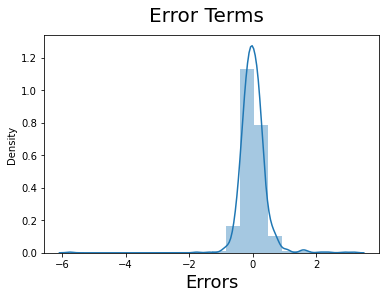

In [584]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_SalePrice), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

The error terms are also normally distributed with mean zeor. The assumption of linear regression is supported.

Homoscedasticity

In [585]:
# Define a function calculating residuals
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [586]:
# Define a function showing homoscedasticity of error terms
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

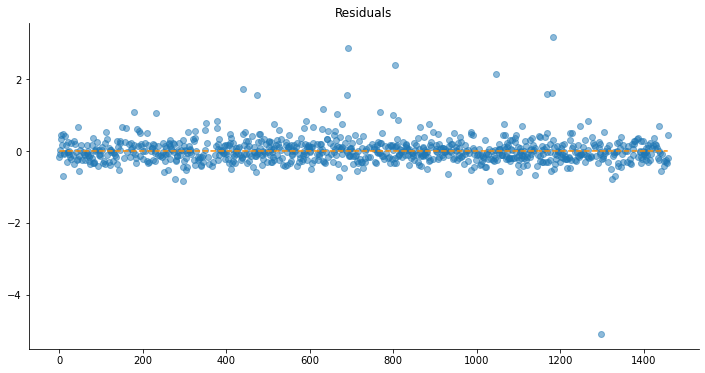

In [587]:
homoscedasticity_assumption(lm, X_train_lm, y_train)

Residuals have relative constant variance. The homoscedasticity assumption is supported.

Checking non-linearity

[Text(0.5, 1.0, 'residual vs predict')]

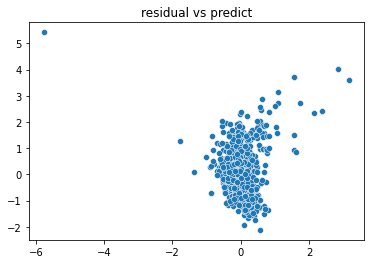

In [588]:
#Plot residual vs predict
residual= y_train - y_train_SalePrice   #Residual
sns.scatterplot(x = residual, y = y_train_SalePrice).set(title='residual vs predict')


No pattern detected. Thus, no need for adjust to the non-linearity

# Prediction

Rescaling on the test dataset

In [589]:
for i in d:
    df_test[i] = scaler.fit_transform(df_test[[i]])

<ipython-input-589-87cf3081a462>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[i] = scaler.fit_transform(df_test[[i]])
<ipython-input-589-87cf3081a462>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[i] = scaler.fit_transform(df_test[[i]])
<ipython-input-589-87cf3081a462>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [590]:
#Dividing into x and y
y_test = df_test.pop('SalePrice')
X_test = df_test

In [591]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

C:\Python\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [592]:
#Dropping variables according to the final model
e=X_train_new9.columns.to_list()
e.append('const')
X_test_m4=X_test_m4[e]

In [593]:
# Making predictions 
y_pred_m4 = lm.predict(X_test_m4)

Model evaluation

In [594]:
# Calculating RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_m4)))

0.9990688891659185


In [595]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.0018613547007774178

Compared with the r2 score 0.819 in the training dataset, the r2 score 0.0019 suggests that the model is overfitting. Thus we decide to use regularization

In [596]:
X_test_m4.pop('const')

202     1.0
1125    1.0
219     1.0
1333    1.0
400     1.0
       ... 
1363    1.0
1455    1.0
336     1.0
373     1.0
53      1.0
Name: const, Length: 219, dtype: float64

# Regularization

# Lasso 

In [597]:
# Performing GridSearchCV with Cross Validation technique on Lasso Regression and finding the optimum value of alpha

params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
lasso = Lasso(normalize=True)
lasso_model = GridSearchCV(lasso, params, cv = 10)
lasso_model.fit(X_train_new9, y_train)
print(lasso_model.best_params_)

{'alpha': 0.00033516026509388476}


In [598]:
# Using value of alpha as 0.00033516026509388476 to get best accuracy for Lasso Regression
model_lasso = Lasso(alpha=0.00033516026509388476)
model_lasso.fit(X_train_new9, y_train) 
pred_train_lasso= model_lasso.predict(X_train_new9)
print('MSE for training')
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print('r2 for training')
print(r2_score(y_train, pred_train_lasso))


pred_test_lasso= model_lasso.predict(X_test_m4)
print('MSE for prediction')
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print('r2 for prediction')
print(r2_score(y_test, pred_test_lasso))


MSE for training
0.42552599736083674
r2 for training
0.8189276255700652
MSE for prediction
0.4599122931634163
r2 for prediction
0.7884806825971677


In [606]:
print(list(zip(model_lasso.coef_, X_test_m4)))
print('Number of features')
print(len(list(zip(model_lasso.coef_, X_test_m4))))

[(-0.11408832169006516, 'MSSubClass'), (-0.061742906452975546, 'LotFrontage'), (0.06010741611131451, 'LotArea'), (0.043215069775444065, 'Neighborhood'), (0.2918063654039365, 'OverallQual'), (0.07868095745766586, 'OverallCond'), (0.10134057148022248, 'YearBuilt'), (0.06698693134780395, 'MasVnrType'), (0.10476088881826467, 'MasVnrArea'), (-0.06239350816049767, 'BsmtExposure'), (0.0639059110361913, 'BsmtFinSF1'), (0.38677384446553364, 'GrLivArea'), (0.06414145429409206, 'BsmtFullBath'), (0.05051713877041698, 'FullBath'), (-0.0884905806521861, 'BedroomAbvGr'), (-0.05722804517797624, 'KitchenAbvGr'), (0.06098473756288461, 'TotRmsAbvGrd'), (0.0425820333713126, 'Functional'), (0.12069491957143834, 'GarageCars'), (0.042263342240489596, 'ScreenPorch')]
Number of features
20


# Ridge

In [600]:
# Performing GridSearchCV with Cross Validation technique on Ridge Regression and finding the optimum value of alpha

params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
ridge = Ridge(normalize=True)
ridge_model = GridSearchCV(ridge, params, cv = 10)
ridge_model.fit(X_train_new9, y_train)
print(ridge_model.best_params_)


{'alpha': 0.27185882427329455}


In [601]:
# Using value of alpha as 0.27185882427329455 to get best accuracy for Ridge Regression
ridge = Ridge(alpha = 0.27185882427329455, normalize = True)
ridge.fit(X_train_new9, y_train)

pred_train_ridge= ridge.predict(X_train_new9)
print('MSE for training')
print(np.sqrt(mean_squared_error(y_train,pred_train_ridge)))
print('r2 for training')
print(r2_score(y_train, pred_train_ridge))

pred_test_ridge= ridge.predict(X_test_m4)
print('MSE for prediction')
print(np.sqrt(mean_squared_error(y_test,pred_test_ridge))) 
print('r2 for prediction')
print(r2_score(y_test, pred_test_ridge))


MSE for training
0.4394754781800427
r2 for training
0.8068613040784228
MSE for prediction
0.4505229790228729
r2 for prediction
0.797029045372356


Ridge regression shows better performance

# Model Interpretation

In [607]:
print(list(zip(ridge.coef_, X_test_m4)))

[(-0.06536214329870138, 'MSSubClass'), (-0.009047812665061272, 'LotFrontage'), (0.056447831641988105, 'LotArea'), (0.046063039798306255, 'Neighborhood'), (0.2518414948524149, 'OverallQual'), (0.053807469281150336, 'OverallCond'), (0.08662361118630833, 'YearBuilt'), (0.056080034038380584, 'MasVnrType'), (0.10267861072403353, 'MasVnrArea'), (-0.05649426325078438, 'BsmtExposure'), (0.08495918254079132, 'BsmtFinSF1'), (0.2348340125936906, 'GrLivArea'), (0.051471523683496924, 'BsmtFullBath'), (0.09007873864769128, 'FullBath'), (-0.050095235397127735, 'BedroomAbvGr'), (-0.0694917615531748, 'KitchenAbvGr'), (0.10828222693177215, 'TotRmsAbvGrd'), (0.03309094616515235, 'Functional'), (0.12625731307360863, 'GarageCars'), (0.04417959676402016, 'ScreenPorch')]


The important features affecting the sale price of houses display as above. Ranking their importance according to their coefficients, we get the most important ones as follows: 'OverallQual', 'GrLivArea', 'GarageCars', 'TotRmsAbvGrd','MasVnrArea'

# Assignment part 2

double alpha

In [609]:
# Using value of alpha as 0.00067032053 to get best accuracy for Lasso Regression
model_lasso = Lasso(alpha=0.00067032053)
model_lasso.fit(X_train_new9, y_train) 
pred_train_lasso= model_lasso.predict(X_train_new9)
print('MSE for training')
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print('r2 for training')
print(r2_score(y_train, pred_train_lasso))


pred_test_lasso= model_lasso.predict(X_test_m4)
print('MSE for prediction')
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print('r2 for prediction')
print(r2_score(y_test, pred_test_lasso))

MSE for training
0.42553448075031775
r2 for training
0.8189204056925574
MSE for prediction
0.45974596785264876
r2 for prediction
0.7886336450432312


In [610]:
print(list(zip(model_lasso.coef_, X_test_m4)))
print('Number of features')
print(len(list(zip(model_lasso.coef_, X_test_m4))))

[(-0.1133959780972966, 'MSSubClass'), (-0.06069034171828932, 'LotFrontage'), (0.059752034144302905, 'LotArea'), (0.042958856582083885, 'Neighborhood'), (0.29255895666746345, 'OverallQual'), (0.07813892454072742, 'OverallCond'), (0.10092745892200855, 'YearBuilt'), (0.06663487941479868, 'MasVnrType'), (0.10438087319258581, 'MasVnrArea'), (-0.06218093397935482, 'BsmtExposure'), (0.06402149457851483, 'BsmtFinSF1'), (0.3863057864389698, 'GrLivArea'), (0.0638625243796311, 'BsmtFullBath'), (0.05023047071664622, 'FullBath'), (-0.0875506060989683, 'BedroomAbvGr'), (-0.05695659449486553, 'KitchenAbvGr'), (0.05996916806187154, 'TotRmsAbvGrd'), (0.04224352866390257, 'Functional'), (0.12076910369054807, 'GarageCars'), (0.04201252707939523, 'ScreenPorch')]
Number of features
20


In [611]:
# Using value of alpha as 0.54371764854 to get best accuracy for Ridge Regression
ridge = Ridge(alpha = 0.54371764854, normalize = True)
ridge.fit(X_train_new9, y_train)

pred_train_ridge= ridge.predict(X_train_new9)
print('MSE for training')
print(np.sqrt(mean_squared_error(y_train,pred_train_ridge)))
print('r2 for training')
print(r2_score(y_train, pred_train_ridge))

pred_test_ridge= ridge.predict(X_test_m4)
print('MSE for prediction')
print(np.sqrt(mean_squared_error(y_test,pred_test_ridge))) 
print('r2 for prediction')
print(r2_score(y_test, pred_test_ridge))


MSE for training
0.4579095436722441
r2 for training
0.7903188498138771
MSE for prediction
0.4596069847760561
r2 for prediction
0.7887614195450621


In [612]:
print(list(zip(ridge.coef_, X_test_m4)))

[(-0.04792725355884921, 'MSSubClass'), (0.010420813221212211, 'LotFrontage'), (0.05334494024310002, 'LotArea'), (0.045322436670347306, 'Neighborhood'), (0.2210842424796948, 'OverallQual'), (0.03847024139104856, 'OverallCond'), (0.08614961879909892, 'YearBuilt'), (0.047490096547844904, 'MasVnrType'), (0.09673470653284517, 'MasVnrArea'), (-0.0547143263402648, 'BsmtExposure'), (0.08318225129677871, 'BsmtFinSF1'), (0.19437531998651983, 'GrLivArea'), (0.04759477129373777, 'BsmtFullBath'), (0.09552212333734451, 'FullBath'), (-0.029852654696647805, 'BedroomAbvGr'), (-0.06388117490864625, 'KitchenAbvGr'), (0.10596975854424263, 'TotRmsAbvGrd'), (0.029285002547041625, 'Functional'), (0.12263943984262078, 'GarageCars'), (0.041370647923458584, 'ScreenPorch')]


Question 3

Five most imporant features in Lasso regression are: 'GrLivArea', 'OverallQual', 'GarageCars','MSSubClass','YearBuilt'.

In [619]:
# Update training and test data set to exclude such variables
droplist=['GrLivArea', 'OverallQual', 'GarageCars','MSSubClass','YearBuilt']
X_train_new9= X_train_new9.drop(droplist,axis=1)
X_test_m4=X_test_m4.drop(droplist,axis=1)

KeyError: "['GrLivArea' 'OverallQual' 'GarageCars' 'MSSubClass' 'YearBuilt'] not found in axis"

In [623]:
# Performing GridSearchCV with Cross Validation technique on Lasso Regression and finding the optimum value of alpha

params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
lasso = Lasso(normalize=True)
lasso_model = GridSearchCV(lasso, params, cv = 10)
lasso_model.fit(X_train_new9, y_train)
print(lasso_model.best_params_)

{'alpha': 0.00023101297000831627}


In [624]:
# Using value of alpha as 0.00023101297000831627 to get best accuracy for Lasso Regression
model_lasso = Lasso(alpha=0.00023101297000831627)
model_lasso.fit(X_train_new9, y_train) 
pred_train_lasso= model_lasso.predict(X_train_new9)
print('MSE for training')
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print('r2 for training')
print(r2_score(y_train, pred_train_lasso))


pred_test_lasso= model_lasso.predict(X_test_m4)
print('MSE for prediction')
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print('r2 for prediction')
print(r2_score(y_test, pred_test_lasso))

MSE for training
0.5488975965811161
r2 for training
0.6987114284674742
MSE for prediction
0.5718134364139177
r2 for prediction
0.6730293939365064


In [625]:
print(list(zip(model_lasso.coef_, X_test_m4)))
print('Number of features')
print(len(list(zip(model_lasso.coef_, X_test_m4))))

[(0.035389478083915946, 'LotFrontage'), (0.06171297865649364, 'LotArea'), (0.08587697624882867, 'Neighborhood'), (0.037055302802668985, 'OverallCond'), (0.1034965968483629, 'MasVnrType'), (0.22093358882124992, 'MasVnrArea'), (-0.09385093213783081, 'BsmtExposure'), (0.13883252518988914, 'BsmtFinSF1'), (0.06461591622952226, 'BsmtFullBath'), (0.3346189857569409, 'FullBath'), (-0.1854396802199562, 'BedroomAbvGr'), (-0.20466172316390194, 'KitchenAbvGr'), (0.430825498127914, 'TotRmsAbvGrd'), (0.06039836142007076, 'Functional'), (0.06521090057402097, 'ScreenPorch')]
Number of features
15
